In [1]:
import networkx as nx
import sympy as sy
import numpy as np
from pycqed import *

In [3]:
s = CircuitGraph()
s.addBranch(0, 1, "C1")
s.addBranch(0, 1, "I1")
s.addBranch(1, 2, "Ca")
s.addBranch(1, 2, "Ia1")
s.addBranch(1, 2, "Ia2")
s.addBranch(2, 3, "C2")
s.addBranch(2, 3, "I2")
s.addBranch(3, 0, "L")
s.addChargeBias(1, "Cg")
s.coupleResonatorCapacitively(2, "Cc")

In [4]:
print("Superconducting loops")
print(s.sc_loops)
print()
print("Closure branches")
print(s.closure_branches)
print()
print("Component map")
print(s.components_map)
print()
print("All loops")
print(s.loops_map)
print()
print("Loop Adjacency")
print(s.loop_adjacency_map)

Superconducting loops
{0: [(1, 2, 1), (0, 3, 0), (0, 1, 1), (3, 2, 1)], 1: [(1, 2, 1), (2, 1, 2)]}

Closure branches
[(3, 2, 1), (2, 1, 2)]

Component map
{(0, 1, 0): 'C1', (0, 1, 1): 'I1', (0, 3, 0): 'L', (1, 2, 0): 'Ca', (1, 2, 1): 'Ia1', (1, 2, 2): 'Ia2', (2, 3, 0): 'C2', (2, 3, 1): 'I2', (1, 0, 0): 'C1', (1, 0, 1): 'I1', (3, 0, 0): 'L', (2, 1, 0): 'Ca', (2, 1, 1): 'Ia1', (2, 1, 2): 'Ia2', (3, 2, 0): 'C2', (3, 2, 1): 'I2'}

All loops
{0: [(0, 1, 0), (0, 1, 1)], 1: [(1, 2, 0), (1, 2, 1)], 2: [(1, 2, 1), (1, 2, 2)], 3: [(2, 3, 0), (2, 3, 1)], 4: [(1, 2, 0), (2, 3, 0), (0, 3, 0), (0, 1, 0)]}

Loop Adjacency
{(0, 4): [(0, 1, 0)], (1, 2): [(1, 2, 1)], (1, 4): [(1, 2, 0)], (3, 4): [(2, 3, 0)]}


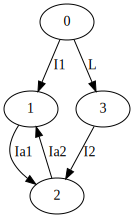

In [5]:
s.drawGraphViz(graph="SCGraph")

In [6]:
sym = SymbolicSystem(s)

KeyboardInterrupt: 

In [ ]:
sym.node_dofs

In [ ]:
sym.branch_dofs

In [ ]:
sym.getChargeVector()

In [ ]:
sym.getVoltageVector()

In [ ]:
sym.getCapacitanceMatrix()

In [ ]:
sym.getFluxVector()

In [ ]:
sym.Rnb*sym.getFluxVector()

In [ ]:
sym.getCurrentVector()

In [ ]:
sym.Rnb*sym.getCurrentVector()

In [ ]:
sym.getInductanceMatrix()

In [ ]:
sym.getQuantumJosephsonEnergies()

In [37]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{1}*(1.0*D^{\dagger}_{1} + 1.0*D_{1}) - 0.5*I_{2}*(e^{i\phi_{32-1e}}*D_{3}*D^{\dagger}_{2} + conjugate(e^{i\phi_{32-1e}})*D^{\dagger}_{3}*D_{2}) - 0.5*I_{a1}*(1.0*D^{\dagger}_{1}*D_{2} + 1.0*D_{1}*D^{\dagger}_{2}) - 0.5*I_{a2}*(e^{i\phi_{21-2e}}*D_{2}*D^{\dagger}_{1} + conjugate(e^{i\phi_{21-2e}})*D^{\dagger}_{2}*D_{1}) + (0.5*(C_{2r}*C_{a} + C_{a}*C_{c})*Q_{1}/(C_{1}*C_{2r}*C_{a} + C_{1}*C_{2r}*C_{c} + C_{1}*C_{a}*C_{c} + C_{2r}*C_{a}*C_{c}) + 0.5*(C_{1}*C_{2r} + C_{1}*C_{c} + C_{2r}*C_{a} + C_{a}*C_{c})*Q_{2}/(C_{1}*C_{2r}*C_{a} + C_{1}*C_{2r}*C_{c} + C_{1}*C_{a}*C_{c} + C_{2r}*C_{a}*C_{c}) + 0.5*(C_{1}*C_{2r} + C_{1}*C_{c} + C_{2r}*C_{a} + C_{a}*C_{c})*Q_{3}/(C_{1}*C_{2r}*C_{a} + C_{1}*C_{2r}*C_{c} + C_{1}*C_{a}*C_{c} + C_{2r}*C_{a}*C_{c}))*Q_{2} + (0.5*(C_{2r}*C_{a} + C_{a}*C_{c})*Q_{1}/(C_{1}*C_{2r}*C_{a} + C_{1}*C_{2r}*C_{c} + C_{1}*C_{a}*C_{c} + C_{2r}*C_{a}*C_{c}) + 0.5*(C_{1}*C_{2r} + C_{1}*C_{c} + C_{2r}*C_{a} + C_{a}*C_{c})*Q_{2}/(C_{1}*C_{2r}*C_{a} + C_{1}*C

In [ ]:
sym.getSymbolList()

In [ ]:
sym.circuit_params

In [ ]:
sym.getParametricExpression('g2r')

In [ ]:
sym.getParametricExpression('C2r')

In [ ]:
sym.getParametricExpression('L2r')

In [ ]:
sym.getParametricExpression('f2rl')

In [ ]:
sym.getParametricExpression('Z2rl')

In [2]:
s = CircuitGraph()
s.addBranch(0, 1, "C1")
s.addBranch(0, 1, "I1")
s.addBranch(1, 2, "L")
s.addBranch(0, 2, "C2")
s.addBranch(0, 2, "I2")
s.addChargeBias(1, "Cg")

In [3]:
print("Superconducting loops")
print(s.sc_loops)
print()
print("Closure branches")
print(s.closure_branches)
print()
print("Component map")
print(s.components_map)
print()
print("All loops")
print(s.loops_map)
print()
print("Loop Adjacency")
print(s.loop_adjacency_map)

Superconducting loops
{0: [(0, 2, 1), (0, 1, 1), (2, 1, 0)]}

Closure branches
[(2, 1, 0)]

Component map
{(0, 1, 0): 'C1', (0, 1, 1): 'I1', (0, 2, 0): 'C2', (0, 2, 1): 'I2', (1, 2, 0): 'L', (1, 0, 0): 'C1', (1, 0, 1): 'I1', (2, 0, 0): 'C2', (2, 0, 1): 'I2', (2, 1, 0): 'L'}

All loops
{0: [(0, 1, 0), (0, 1, 1)], 1: [(0, 2, 0), (0, 2, 1)], 2: [(1, 2, 0), (0, 2, 0), (0, 1, 0)]}

Loop Adjacency
{(0, 2): [(0, 1, 0)], (1, 2): [(0, 2, 0)]}


In [4]:
sym = SymbolicSystem(s)

In [5]:
sym.coordinate_modes

{1: 'charge', 2: 'oscillator'}

In [6]:
sym.node_dofs

{0: (\Phi_{0}, Q_{0}, D_{0}, D^{\dagger}_{0}),
 1: (\Phi_{1}, Q_{1}, D_{1}, D^{\dagger}_{1}),
 2: (\Phi_{2}, Q_{2}, D_{2}, D^{\dagger}_{2})}

In [7]:
sym.branch_dofs

{(0, 1, 1): (\Phi_{01-1}, Q_{01-1}, D_{01-1}, D^{\dagger}_{01-1}),
 (0, 2, 1): (\Phi_{02-1}, Q_{02-1}, D_{02-1}, D^{\dagger}_{02-1}),
 (2, 1, 0): (\Phi_{21-0}, Q_{21-0}, D_{21-0}, D^{\dagger}_{21-0})}

In [8]:
sym.getChargeVector()

Matrix([
[Q_{1}],
[Q_{2}]])

In [9]:
sym.getVoltageVector()

Matrix([
[V_{1}],
[V_{2}]])

In [10]:
sym.getCapacitanceMatrix()

Matrix([
[C_{1} + C_{g},     0],
[            0, C_{2}]])

In [11]:
sym.getFluxVector()

Matrix([
[\Phi_{1}],
[\Phi_{2}]])

In [12]:
sym.Rnb*sym.getFluxVector()

Matrix([
[               -1.0*\Phi_{1}],
[               -1.0*\Phi_{2}],
[-1.0*\Phi_{1} + 1.0*\Phi_{2}]])

In [13]:
sym.getCurrentVector()

Matrix([
[I_{1}],
[I_{2}]])

In [14]:
sym.Rnb*sym.getCurrentVector()

Matrix([
[            -1.0*I_{1}],
[            -1.0*I_{2}],
[-1.0*I_{1} + 1.0*I_{2}]])

In [15]:
sym.getInductanceMatrix()

Matrix([
[ 1.0*L_{}, -1.0*L_{}],
[-1.0*L_{},  1.0*L_{}]])

In [16]:
sym.getQuantumJosephsonEnergies()

Matrix([[-0.5*I_{1}*(1.0*D^{\dagger}_{1} + 1.0*D_{1}) - 0.5*I_{2}*(1.0*D^{\dagger}_{2} + 1.0*D_{2})]])

In [17]:
sym.getQuantumHamiltonian()

Matrix([[-0.5*I_{1}*(1.0*D^{\dagger}_{1} + 1.0*D_{1}) - 0.5*I_{2}*(1.0*D^{\dagger}_{2} + 1.0*D_{2}) + (0.5*(0.5/(C_{1} + C_{g}) - 0.5/C_{2})*Q_{2} + 0.5*(0.5/(C_{1} + C_{g}) + 0.5/C_{2})*(Q_{1e} + Q_{1}))*(Q_{1e} + Q_{1}) + (0.5*(0.5/(C_{1} + C_{g}) - 0.5/C_{2})*(Q_{1e} + Q_{1}) + 0.5*(0.5/(C_{1} + C_{g}) + 0.5/C_{2})*Q_{2})*Q_{2} + 1.0*\Phi_{2}**2/L_{}]])

In [18]:
sym.getSymbolList()

{'C1': C_{1},
 'I1': I_{1},
 'C2': C_{2},
 'I2': I_{2},
 'L': L_{},
 'Cg': C_{g},
 'phi21-0e': \Phi_{21-0e},
 'Q1e': Q_{1e}}

In [19]:
Linv = sym.getInverseInductanceMatrix()
Cinv = sym.getInverseCapacitanceMatrix()

In [20]:
E, V = np.linalg.eigh(np.matrix([[1, -1], [-1, 1]]))

In [21]:
R = V
RT = V.T
Rinv = np.linalg.inv(V)
RinvT = Rinv.T

In [22]:
Linv

Matrix([
[0,        0],
[0, 2.0/L_{}]])

In [23]:
Cinv

Matrix([
[0.5/(C_{1} + C_{g}) + 0.5/C_{2}, 0.5/(C_{1} + C_{g}) - 0.5/C_{2}],
[0.5/(C_{1} + C_{g}) - 0.5/C_{2}, 0.5/(C_{1} + C_{g}) + 0.5/C_{2}]])

In [60]:
RinvT

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [61]:
RinvT*Linv*Rinv

Matrix([
[0,        0],
[0, 2.0/L_{}]])

In [62]:
R*Cinv*RT

Matrix([
[0.5/(C_{1} + C_{g}) + 0.5/C_{2}, 0.5/(C_{1} + C_{g}) - 0.5/C_{2}],
[0.5/(C_{1} + C_{g}) - 0.5/C_{2}, 0.5/(C_{1} + C_{g}) + 0.5/C_{2}]])

In [63]:
sym.getInductanceMatrix()

Matrix([
[ 1.0*L_{}, -1.0*L_{}],
[-1.0*L_{},  1.0*L_{}]])

In [66]:
m = np.linalg.pinv(np.matrix([[1, -1], [-1, 1]]))

In [67]:
np.linalg.eigh(m)

(array([5.55111512e-17, 5.00000000e-01]),
 matrix([[ 0.70710678,  0.70710678],
         [ 0.70710678, -0.70710678]]))

In [68]:
Linv

Matrix([
[ 1.0/L_{}, -1.0/L_{}],
[-1.0/L_{},  1.0/L_{}]])

In [69]:
Linv.shape

(2, 2)

In [70]:
np.zeros(Linv.shape)

array([[0., 0.],
       [0., 0.]])

In [72]:
Cinv[0, 1] == 0

True

In [74]:
Linv[0, 1]

AttributeError: 'Mul' object has no attribute 'sign'

In [75]:
Linv.free_symbols

{L_{}}

In [76]:
subs = {sym: 1.0 for sym in Linv.free_symbols}

In [77]:
subs

{L_{}: 1.0}

In [80]:
np.asmatrix(Linv.subs(subs), dtype=np.float64)

matrix([[ 1., -1.],
        [-1.,  1.]])

In [25]:
list(range(1, 3))

[1, 2]